In [2]:
import pandas as pd

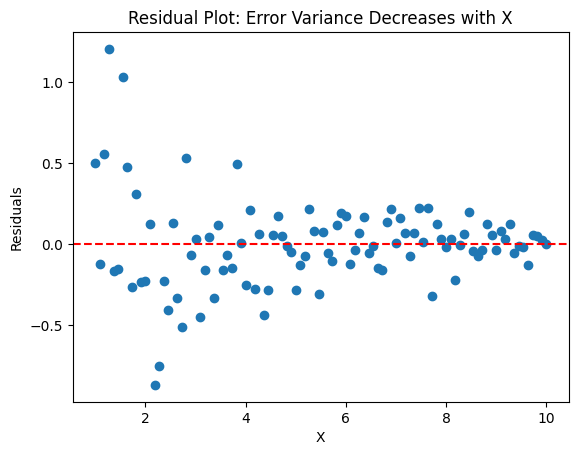

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(1, 10, 100)
true_regression = 2 * X + 3
error = np.random.normal(0, 1, 100) * (1 / X)  # Error variance decreases with X
Y = true_regression + error

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
Y_pred = model.predict(X.reshape(-1, 1))

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot: Error Variance Decreases with X')
plt.show()

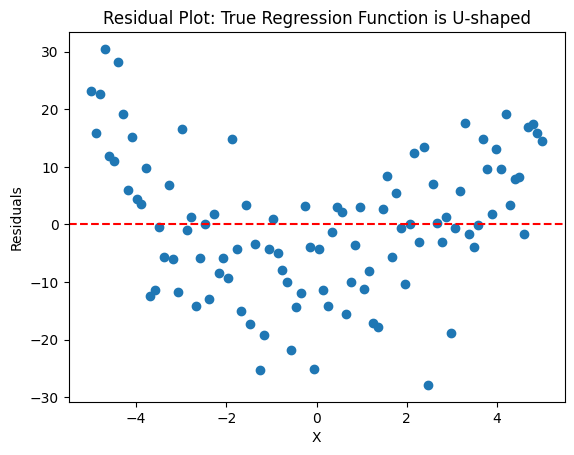

In [4]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-5, 5, 100)
true_regression = X**2  # U-shaped true regression function
error = np.random.normal(0, 10, 100)
Y = true_regression + error

# Fit a linear regression model
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
Y_pred = model.predict(X.reshape(-1, 1))

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot: True Regression Function is U-shaped')
plt.show()

/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_32486/444506632.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('CH01PR19.txt', delim_whitespace=True, header=None)


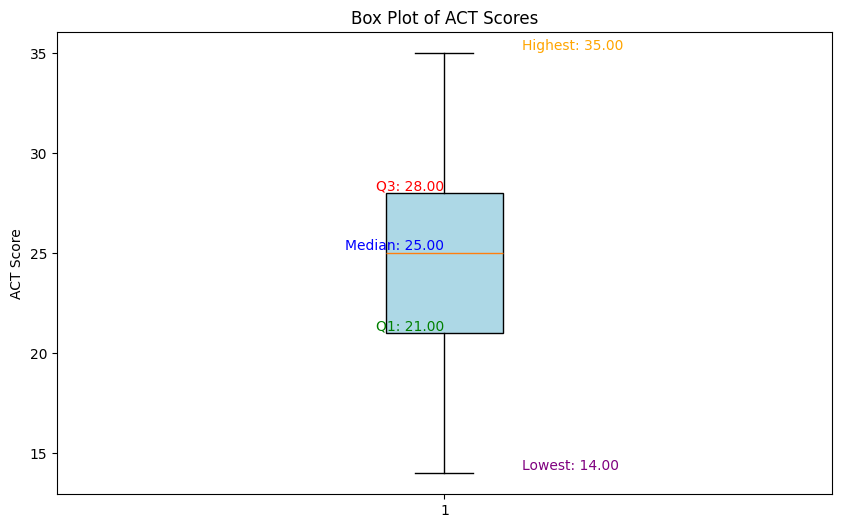

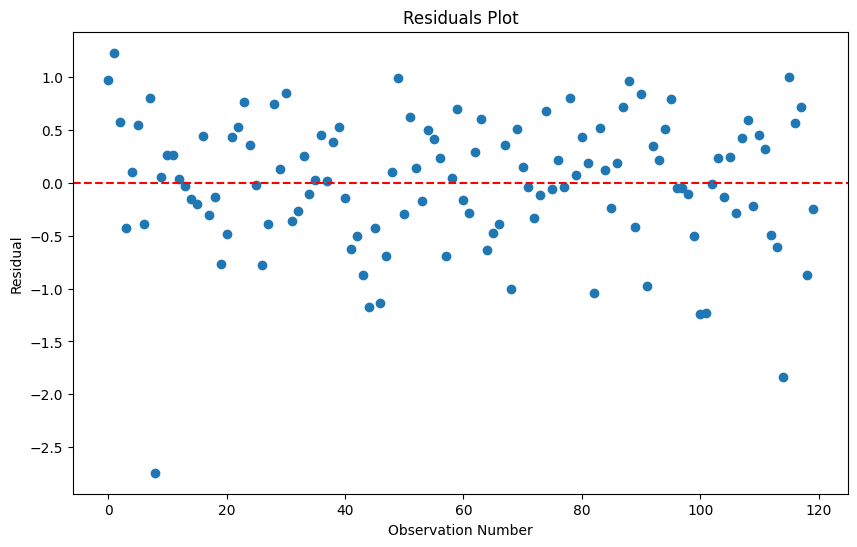

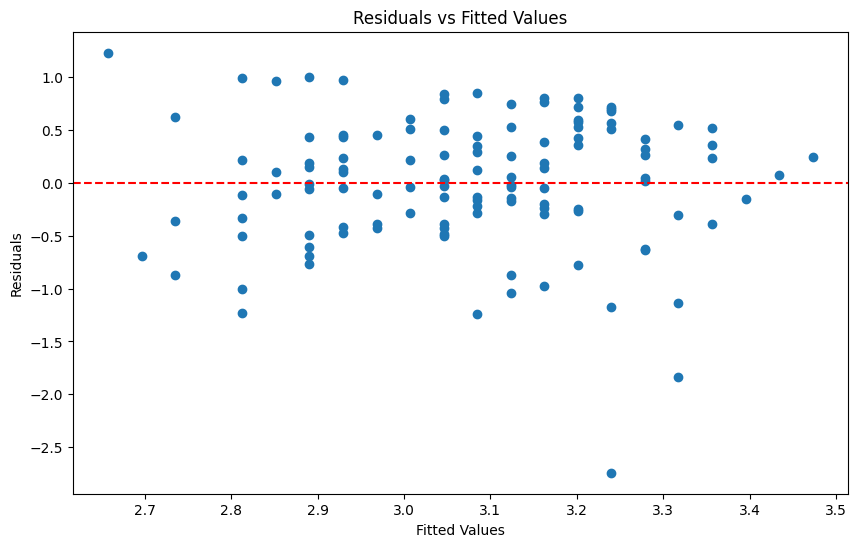

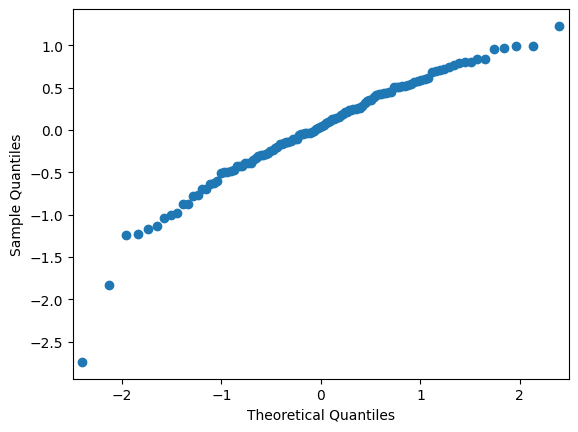


Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     9.240
Date:                Wed, 29 Jan 2025   Prob (F-statistic):            0.00292
Time:                        12:35:01   Log-Likelihood:                -112.50
No. Observations:                 120   AIC:                             229.0
Df Residuals:                     118   BIC:                             234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1140    

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan

# Read the data
data = pd.read_csv('CHimport import importimport impo1PR19.txt', delim_whitespace=True, header=None)
data.columns = ['GPA', 'ACT']

# Create the model
X = data['ACT']
X = sm.add_constant(X)
y = data['GPA']

model = sm.OLS(y, X).fit()
residuals = model.resid
fitted_values = model.fittedvalues

# Calculate median, Q1, Q3, and IQR
Q1 = np.percentile(data['ACT'], 25)
median = np.percentile(data['ACT'], 50)
Q3 = np.percentile(data['ACT'], 75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data['ACT'][(data['ACT'] < lower_bound) | (data['ACT'] > upper_bound)]

# Determine the highest and lowest non-outlier values
non_outliers = data['ACT'][(data['ACT'] >= lower_bound) & (data['ACT'] <= upper_bound)]
lowest_value = non_outliers.min()
highest_value = non_outliers.max()

# Create the box plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data['ACT'], patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Annotate median, Q1, Q3, and outliers
plt.text(1, median, f'Median: {median:.2f}', verticalalignment='bottom', horizontalalignment='right', color='blue')
plt.text(1, Q1, f'Q1: {Q1:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green')
plt.text(1, Q3, f'Q3: {Q3:.2f}', verticalalignment='bottom', horizontalalignment='right', color='red')

# Highlight outliers
for outlier in outliers:
    plt.plot(1, outlier, 'ro')  # Plot outliers as red dots

# Annotate the lowest and highest non-outlier values
plt.text(1.1, lowest_value, f'Lowest: {lowest_value:.2f}', verticalalignment='bottom', horizontalalignment='left', color='purple')
plt.text(1.1, highest_value, f'Highest: {highest_value:.2f}', verticalalignment='bottom', horizontalalignment='left', color='orange')

plt.title('Box Plot of ACT Scores')
plt.ylabel('ACT Score')
plt.show()

# b. Dot plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Observation Number')
plt.ylabel('Residual')
plt.show()

# c. Residuals vs Fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# d. Normal probability plot
probplot = qqplot(residuals)
plt.show()

# Calculate correlation coefficient for normality test
sorted_residuals = np.sort(residuals)
theoretical_quantiles = stats.norm.ppf(np.linspace(0.5/len(residuals), 
                                                 1-0.5/len(residuals), 
                                                 len(residuals)))
correlation_coef = np.corrcoef(sorted_residuals, theoretical_quantiles)[0,1]

# e. Brown-Forsythe test
# Split data into two groups
group1 = residuals[X['ACT'] < 26]
group2 = residuals[X['ACT'] >= 26]

# Calculate medians for each group
med1 = np.median(group1)
med2 = np.median(group2)

# Calculate absolute deviations from group medians
dev1 = np.abs(group1 - med1)
dev2 = np.abs(group2 - med2)

# Perform t-test on the deviations
t_stat, p_value = stats.ttest_ind(dev1, dev2)

print("\nRegression Model Summary:")
print(model.summary())

print("\nNormal Probability Plot Correlation Coefficient:", correlation_coef)

print("\nBrown-Forsythe Test Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_32486/3388994773.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gpa_act = pd.read_csv('CH01PR19.txt', delim_whitespace=True, header=None)
/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_32486/3388994773.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  additional_vars = pd.read_csv('chapter3/CH03PR03.txt', delim_whitespace=True, header=None)


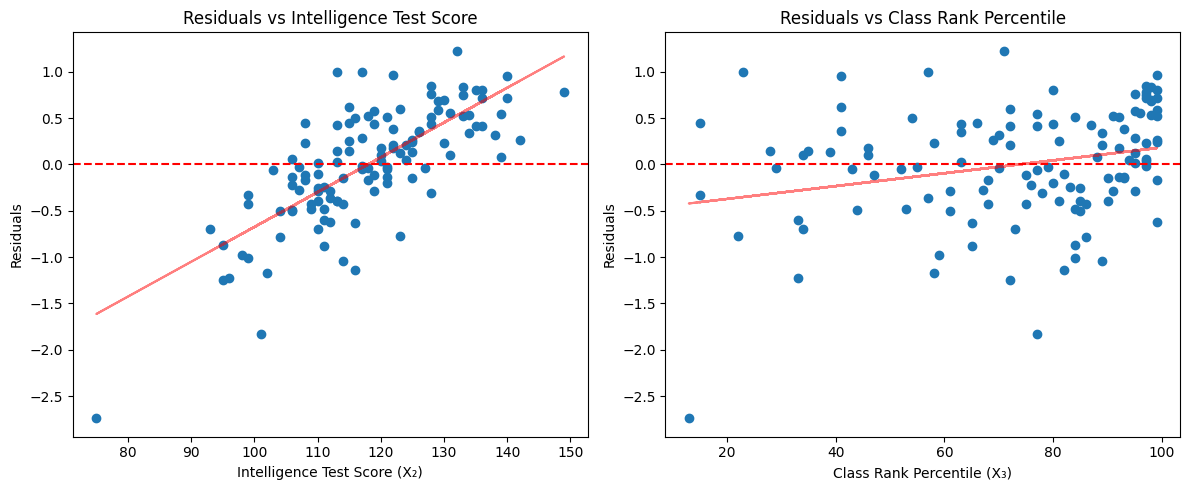


Correlation between residuals and X₂ (Intelligence Test Score): 0.7422195537286371
Correlation between residuals and X₃ (Class Rank Percentile): 0.25625195963845204

R-squared for original model: 0.07262044229163733
R-squared for model including X₂: 0.6375378585179545
R-squared for model including X₃: 0.14969371249113717

ANOVA for model with X₂:
(np.float64(182.35101031028134), np.float64(1.2721675381272506e-25), np.float64(1.0))

ANOVA for model with X₃:
(np.float64(10.605087538233086), np.float64(0.0014757250942502918), np.float64(1.0))


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the original data and calculate residuals
gpa_act = pd.read_csv('CH01PR19.txt', delim_whitespace=True, header=None)
gpa_act.columns = ['GPA', 'ACT']

# Create the base model
X = gpa_act['ACT']
X = sm.add_constant(X)
y = gpa_act['GPA']

model = sm.OLS(y, X).fit()
residuals = model.resid

# Read the additional variables data
additional_vars = pd.read_csv('chapter3/CH03PR03.txt', delim_whitespace=True, header=None)
additional_vars.columns = ["gpa", 'act', 'X2', 'X3']

# Create plots for residuals vs each new variable
plt.figure(figsize=(12, 5))

# Plot residuals vs X2 (intelligence test score)
plt.subplot(1, 2, 1)
plt.scatter(additional_vars['X2'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Intelligence Test Score (X₂)')
plt.ylabel('Residuals')
plt.title('Residuals vs Intelligence Test Score')

# Add regression line for visual trend
X2_reg = sm.add_constant(additional_vars['X2'])
model_X2 = sm.OLS(residuals, X2_reg).fit()
plt.plot(additional_vars['X2'], model_X2.predict(X2_reg), color='red', alpha=0.5)

# Plot residuals vs X3 (class rank percentile)
plt.subplot(1, 2, 2)
plt.scatter(additional_vars['X3'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Class Rank Percentile (X₃)')
plt.ylabel('Residuals')
plt.title('Residuals vs Class Rank Percentile')

# Add regression line for visual trend
X3_reg = sm.add_constant(additional_vars['X3'])
model_X3 = sm.OLS(residuals, X3_reg).fit()
plt.plot(additional_vars['X3'], model_X3.predict(X3_reg), color='red', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate correlations between residuals and new variables
corr_X2 = np.corrcoef(additional_vars['X2'], residuals)[0,1]
corr_X3 = np.corrcoef(additional_vars['X3'], residuals)[0,1]

print("\nCorrelation between residuals and X₂ (Intelligence Test Score):", corr_X2)
print("Correlation between residuals and X₃ (Class Rank Percentile):", corr_X3)

# Fit models including each new variable to assess improvement
# Model with X2
X_with_X2 = pd.concat([gpa_act['ACT'], additional_vars['X2']], axis=1)
X_with_X2 = sm.add_constant(X_with_X2)
model_with_X2 = sm.OLS(y, X_with_X2).fit()

# Model with X3
X_with_X3 = pd.concat([gpa_act['ACT'], additional_vars['X3']], axis=1)
X_with_X3 = sm.add_constant(X_with_X3)
model_with_X3 = sm.OLS(y, X_with_X3).fit()

print("\nR-squared for original model:", model.rsquared)
print("R-squared for model including X₂:", model_with_X2.rsquared)
print("R-squared for model including X₃:", model_with_X3.rsquared)

# F-test for improvement in model fit
print("\nANOVA for model with X₂:")
print(model_with_X2.compare_f_test(model))

print("\nANOVA for model with X₃:")
print(model_with_X3.compare_f_test(model))

/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_32486/4033019875.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('chapter3/CH03PR09.txt', delim_whitespace=True, header=None)


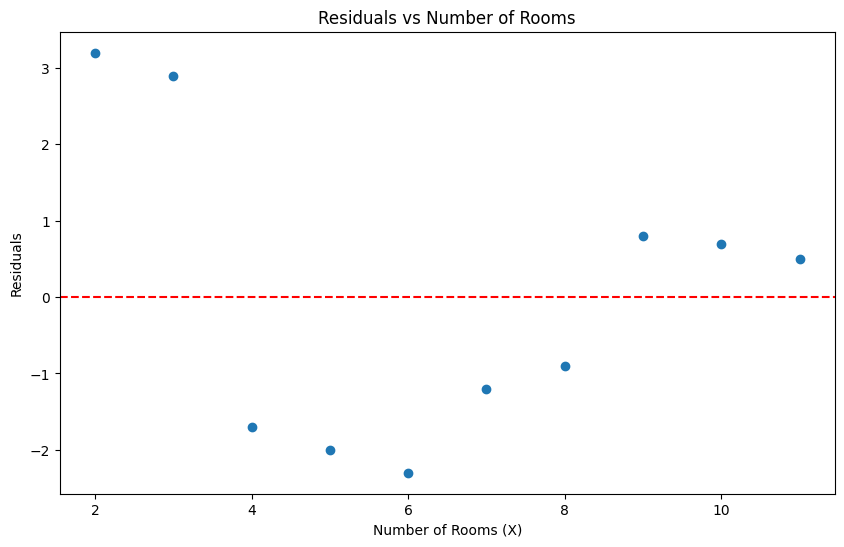

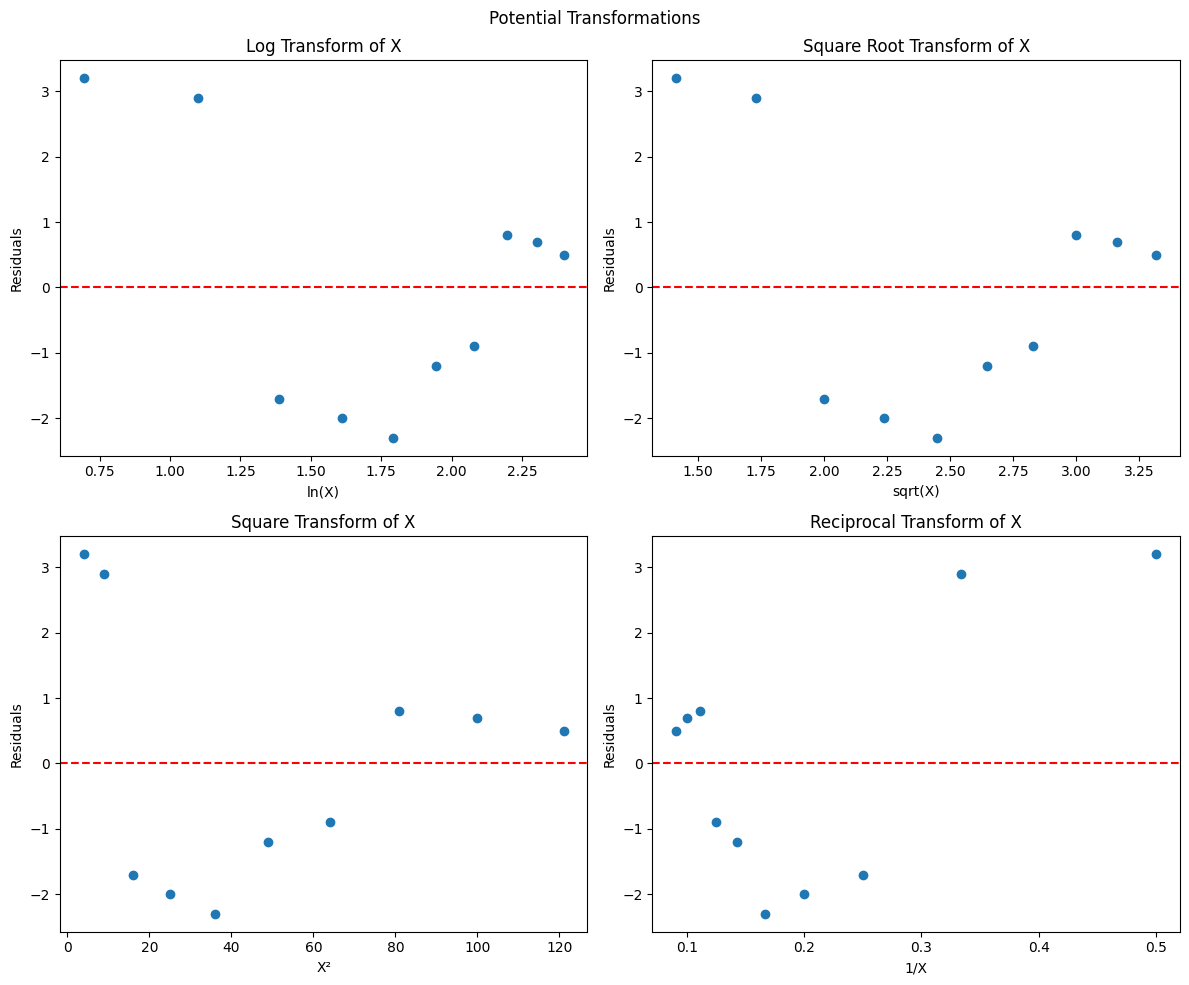

Correlation between X and residuals: -0.2138


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data
data = pd.read_csv('chapter3/CH03PR09.txt', delim_whitespace=True, header=None)
data.columns = ['rooms', 'residuals']

# Create residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(data['rooms'], data['residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Number of Rooms (X)')
plt.ylabel('Residuals')
plt.title('Residuals vs Number of Rooms')

# Add a trend line to help visualize pattern
# z = np.polyfit(data['rooms'], data['residuals'], 1)
# p = np.poly1d(z)
# plt.plot(data['rooms'], p(data['rooms']), "r--", alpha=0.8)

plt.show()

# Let's also create plots with common transformations to explore solutions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Potential Transformations')

# Log transformation of X
axes[0, 0].scatter(np.log(data['rooms']), data['residuals'])
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('ln(X)')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Log Transform of X')

# Square root transformation of X
axes[0, 1].scatter(np.sqrt(data['rooms']), data['residuals'])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('sqrt(X)')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Square Root Transform of X')

# Square transformation of X
axes[1, 0].scatter(data['rooms']**2, data['residuals'])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('X²')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Square Transform of X')

# Reciprocal transformation of X
axes[1, 1].scatter(1/data['rooms'], data['residuals'])
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('1/X')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Reciprocal Transform of X')

plt.tight_layout()
plt.show()

# Print correlation between X and residuals to quantify the pattern
correlation = data['rooms'].corr(data['residuals'])
print(f"Correlation between X and residuals: {correlation:.4f}")

/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_32486/2016723209.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('chapter3/CH03PR10.txt', delim_whitespace=True, header=None)


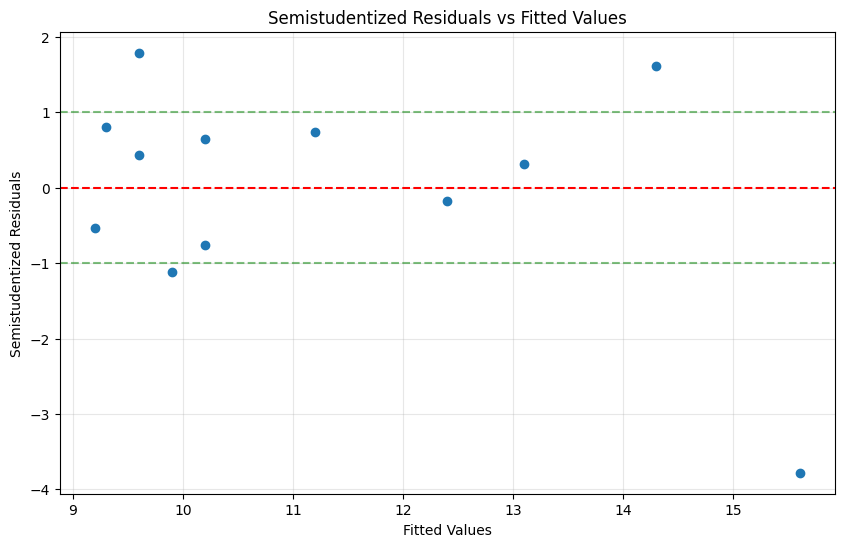


Analysis of Semistudentized Residuals:
Total number of observations: 12
Number of residuals outside ±1 SD: 4
Expected number outside ±1 SD under normality: -8.19
Percentage outside ±1 SD: 33.3%
Expected percentage outside ±1 SD under normality: -68.3%


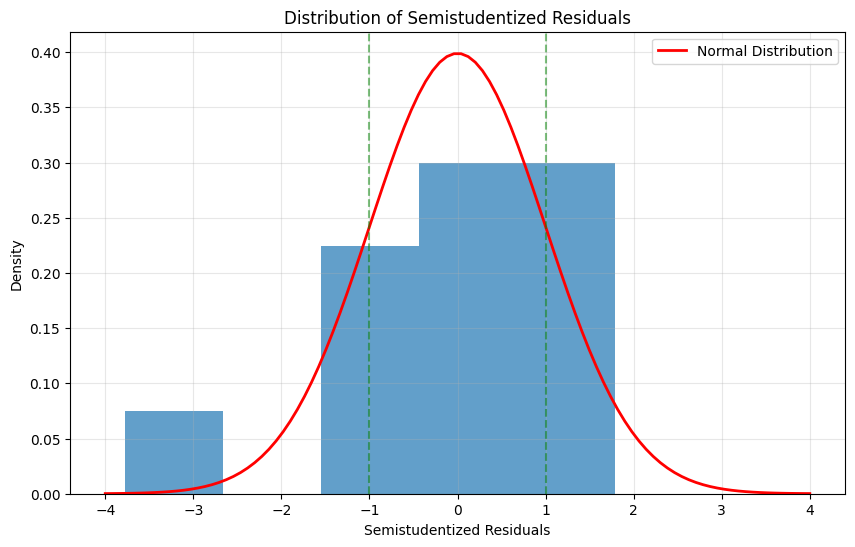

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
data = pd.read_csv('chapter3/CH03PR10.txt', delim_whitespace=True, header=None)
data.columns = ['fitted_values', 'semistudentized_residuals']

# a. Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(data['fitted_values'], data['semistudentized_residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=1, color='g', linestyle='--', alpha=0.5)
plt.axhline(y=-1, color='g', linestyle='--', alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Semistudentized Residuals')
plt.title('Semistudentized Residuals vs Fitted Values')

# Add a trend line to help visualize pattern
# z = np.polyfit(data['fitted_values'], data['semistudentized_residuals'], 1)
# p = np.poly1d(z)
# plt.plot(data['fitted_values'], p(data['fitted_values']), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

# b. Count residuals outside ±1 standard deviation
outside_count = np.sum(np.abs(data['semistudentized_residuals']) > 1)
total_count = len(data)
expected_count = total_count * (1 - stats.norm.cdf(1) * 2)  # Expected number outside ±1 SD

print("\nAnalysis of Semistudentized Residuals:")
print(f"Total number of observations: {total_count}")
print(f"Number of residuals outside ±1 SD: {outside_count}")
print(f"Expected number outside ±1 SD under normality: {expected_count:.2f}")
print(f"Percentage outside ±1 SD: {(outside_count/total_count)*100:.1f}%")
print(f"Expected percentage outside ±1 SD under normality: {(expected_count/total_count)*100:.1f}%")

# Add histogram for visualization of distribution
plt.figure(figsize=(10, 6))
plt.hist(data['semistudentized_residuals'], bins='auto', density=True, alpha=0.7)
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', lw=2, label='Normal Distribution')
plt.axvline(x=-1, color='g', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='g', linestyle='--', alpha=0.5)
plt.xlabel('Semistudentized Residuals')
plt.ylabel('Density')
plt.title('Distribution of Semistudentized Residuals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()